In [1]:
!pip install tick

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 63.9 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.4/52.4 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 73.1 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.7/84.7 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.0/94.0 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.2/121.2 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.5/100.5 kB 10.4 MB/s eta 0:00:00


In [2]:
!pip install tensorflow==1.14.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.3/109.3 MB 10.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.5/488.5 kB 38.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 68.5 MB/s eta 0:00:00:00:01
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.11.0
    Uninstalling tensorflow-estimator-2.11.0:
      Successfully uninstalled tensorflow-estimator-2.11.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.11.2
    Uninstalling tensorboard-2.11.2:
      Successfully uninstalled tensorboard-2.11.2
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.11.0
    Uninstalling tensorflow-2.11.0:
      Successfully uninstalled tensorflow-2.11.0
ERROR: pip's dependency re

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.sparse.linalg import svds

In [15]:
%matplotlib inline

In [5]:
from tick.plot import plot_hawkes_kernel_norms

In [6]:
from tick.hawkes import HawkesCumulantMatching

/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [7]:
class ChangePointDetector:
    def __init__(self, A_list, c=2, epsilon=1e-2, B=100, m=100, alpha=0.05):
        self.logG_seq = logG_sequence(A_list, epsilon=epsilon)
        print(f"Finished computing the nearest SPDs of the input sequence of {len(A_list)} graphs")
        self.c = c
        self.epsilon = epsilon
        self.B = B
        self.m = m
        self.alpha = alpha
        self.cp_detected = []
        self.test_stats = []
    
    def frechet_stats_test(self, logG_seq):
        T = logG_seq.shape[0]
        if T <= 2*self.c + 2: return False, -1, -1
        print(f"Testing a sequence of {T} graphs")
        
        t1, t2 = since_until(T, self.c)
        
        test_stats_seq, since = test_statistics_online_two_pass(logG_seq, self.c)
        reference_stats = np.zeros(self.B, dtype=float)
        for b in range(self.B):
            reference_stats[b] = max(test_statistics_online_two_pass(logG_seq[np.random.choice(np.arange(T), size=self.m, replace=True)], self.c)[0]) #max(test_statistics_online_two_pass(logG_seq[np.random.choice(np.arange(T), size=T, replace=True)], self.c)[0])
        reference_stats.sort()
        q_one_minus_alpha = reference_stats[-int(self.alpha*self.B)]

        if max(test_stats_seq) > q_one_minus_alpha:
            return True, test_stats_seq.argmax() + since, (test_stats_seq, t1)
        else:
            return False, -1, -1
        
    def binary_segmentation(self, logG_seq=None, since=0):
        if logG_seq is None:
            logG_seq = self.logG_seq
        print(f"sequence: {since}, {since+logG_seq.shape[0]}")
        exist, loc, test_stats_seq = self.frechet_stats_test(logG_seq)
        if exist:
            self.cp_detected.append(loc+since)
            seq, t1 = test_stats_seq
            self.test_stats.append([seq, since+t1, since+t1+seq.shape[0]])
            self.binary_segmentation(logG_seq[:loc], since=since)
            self.binary_segmentation(logG_seq[loc:], since=loc+since)
            
    def restart(self):
        self.cp_detected = []
        self.test_stats = []

In [8]:
def signed_Laplacian(a):
    return np.diag(np.abs(a).sum(axis=0) - np.diag(np.abs(a))) - (a - np.diag(np.diag(a)))


def logG_sequence(adj_list, epsilon=1e-2):
    num_nodes = adj_list[0].shape[0]
    T = len(adj_list)
    logG_seq = np.zeros((T, num_nodes, num_nodes))
    for t, A_t in enumerate(adj_list):
        L_t = signed_Laplacian(A_t)
        vecs, vals, _ = svds(L_t, k=num_nodes-1, which="LM")
        vals[vals <= 0] = epsilon
        logG_t = vecs @ np.diag(np.log(vals)) @ vecs.T
        logG_seq[t] = logG_t
        
    return logG_seq

In [9]:
def since_until(T, c):
    if 0 < c < 1:
        since, until = int(np.ceil(c * T)), int(np.floor(T - c * T))
    elif c >= 1:
        since, until = int(c) + 1, T - int(c) - 1
    else:
        raise Exception("The interval parameter *c* is not valid.")
    
    return since, until

def dist(A, order=2):
#     return ((A ** 2).sum(axis=(1, 2)) ** (order//2)).sum()
    if order == 2:
        return np.einsum('ijk,ijk->...', A, A)
    else:
        return (np.einsum('ijk,ijk->i', A, A)**(order//2)).sum()

def test_statistics_online_two_pass(X_seq, c):
    if isinstance(X_seq, list):
        T = len(X_seq)
    else:
        T = X_seq.shape[0]

    since, until = since_until(T, c)
    
    test_stats_seq = np.zeros(until - since, dtype=np.float64)
    sample_mu = X_seq.mean(axis=0)
    sample_V = (
        dist(X_seq - sample_mu) / T
    )
    sigma2 = dist(X_seq - sample_mu, order=4) / T - sample_V**2
    mu1_seq = np.zeros((until - since, *X_seq.shape[1:]), dtype=np.float64)
    mu2_seq = np.zeros((until - since, *X_seq.shape[1:]), dtype=np.float64)
    V1_seq = np.zeros(until - since, dtype=np.float64)
    V2_seq = np.zeros(until - since, dtype=np.float64)

    for idx, tau in enumerate(range(since, until)):
        if idx == 0:
            mu1 = X_seq[:tau].mean(axis=0)
            V1 = dist(X_seq[:tau] - mu1) / tau
        else:
            mu1_new = mu1 + 1 / tau * (X_seq[tau - 1] - mu1)
            V1 = V1 + (
                -V1 + np.einsum("ij,ij", X_seq[tau - 1] - mu1, X_seq[tau - 1] - mu1_new)
            ) / (tau)
            mu1 = mu1_new
        mu1_seq[idx] = mu1
        V1_seq[idx] = V1

    for idx, tau in enumerate(reversed(range(since, until))):
        if idx == 0:
            mu2 = X_seq[tau:].mean(axis=0)
            V2 = dist(X_seq[tau:] - mu2) / (T - tau)
        else:
            mu2_new = mu2 + 1 / (T - tau) * (X_seq[tau] - mu2)
            V2 = V2 + (
                -V2 + np.einsum("ij,ij", X_seq[tau] - mu2, X_seq[tau] - mu2_new)
            ) / (T - tau)
            mu2 = mu2_new
        mu2_seq[idx] = mu2
        V2_seq[idx] = V2

    mu2_seq = mu2_seq[::-1]
    V2_seq = V2_seq[::-1]
    mu_diff_seq = np.einsum("ijk,ijk->i", mu2_seq - mu1_seq, mu2_seq - mu1_seq)
    Vc1_seq = V1_seq + mu_diff_seq
    Vc2_seq = V2_seq + mu_diff_seq
    test_stats_seq = (
        np.arange(since, until)
        * (T - 1 - np.arange(since, until))
        / T**2
        / sigma2
        * ((V1_seq - V2_seq) ** 2 + (Vc1_seq - V1_seq + Vc2_seq - V2_seq) ** 2)
    )

    return T * test_stats_seq, since

In [123]:
events = pd.read_pickle("coin-price-events/events_all.pkl")

In [136]:
phi_list = []
events_count_week = []
for i in range(len(events.keys())-1):
    week1 = list(events.keys())[i]
    week2 = list(events.keys())[i+1]
    events_week1 = events[week1]
    events_week2 = events[week2]
    events_week = [np.hstack([coin_week1, coin_week2 + 7*24*3600*1000000000]).astype(np.float64)/1000000000 for coin_week1, coin_week2 in zip(events_week1, events_week2)] # the timestamp value unit is ns
    integration_support = 36000
    nphc = HawkesCumulantMatching(integration_support, tol=1e-10)
    nphc.fit([events_week])
    phi = nphc.adjacency #nphc.solution - np.eye(nphc.solution.shape[0])
    phi_list.append((phi + phi.T)/2)
    events_count_week.append(np.sum([coin_week.shape[0] for coin_week in events_week]))
#     break

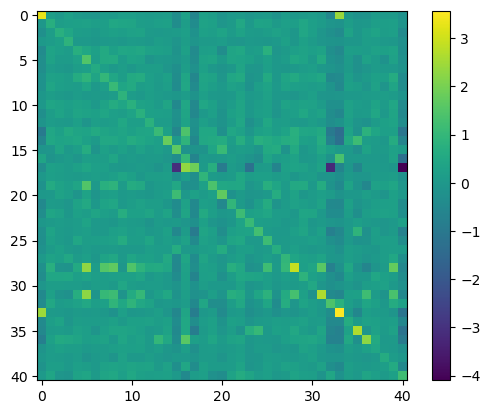

In [160]:
plt.imshow(nphc.solution)
plt.colorbar()

In [159]:
np.diff(events_week[0]).mean()

4512.1621621621625

In [157]:
MHP_cp = ChangePointDetector(phi_list, B=200, m=100, c=2, alpha=0.2)
MHP_cp.binary_segmentation()
print(
    f"Detected (Fréchet): {MHP_cp.cp_detected}"
)

Finished computing the nearest SPDs of the input sequence of 56 graphs
sequence: 0, 56
Testing a sequence of 56 graphs
sequence: 0, 19
Testing a sequence of 19 graphs
sequence: 0, 14
Testing a sequence of 14 graphs
sequence: 14, 19
sequence: 19, 56
Testing a sequence of 37 graphs
sequence: 19, 46
Testing a sequence of 27 graphs
sequence: 19, 40
Testing a sequence of 21 graphs
sequence: 19, 33
Testing a sequence of 14 graphs
sequence: 33, 40
Testing a sequence of 7 graphs
sequence: 40, 46
sequence: 46, 56
Testing a sequence of 10 graphs
Detected (Fréchet): [19, 14, 46, 40, 33]


In [164]:
from pandas import Timestamp
list_start_of_week = \
[Timestamp('2022-03-01 00:00:00'),
 Timestamp('2022-03-07 00:00:00'),
 Timestamp('2022-03-14 00:00:00'),
 Timestamp('2022-03-21 00:00:00'),
 Timestamp('2022-03-28 00:00:00'),
 Timestamp('2022-04-04 00:00:00'),
 Timestamp('2022-04-11 00:00:00'),
 Timestamp('2022-04-18 00:00:00'),
 Timestamp('2022-04-25 00:00:00'),
 Timestamp('2022-05-02 00:00:00'),
 Timestamp('2022-05-09 00:00:00'),
 Timestamp('2022-05-16 00:00:00'),
 Timestamp('2022-05-23 00:00:00'),
 Timestamp('2022-05-30 00:00:00'),
 Timestamp('2022-06-06 00:00:00'),
 Timestamp('2022-06-13 00:00:00'),
 Timestamp('2022-06-20 00:00:00'),
 Timestamp('2022-06-27 00:00:00'),
 Timestamp('2022-07-04 00:00:00'),
 Timestamp('2022-07-11 00:00:00'),
 Timestamp('2022-07-18 00:00:00'),
 Timestamp('2022-07-25 00:00:00'),
 Timestamp('2022-08-01 00:00:00'),
 Timestamp('2022-08-08 00:00:00'),
 Timestamp('2022-08-15 00:00:00'),
 Timestamp('2022-08-22 00:00:00'),
 Timestamp('2022-08-29 00:00:00'),
 Timestamp('2022-09-05 00:00:00'),
 Timestamp('2022-09-12 00:00:00'),
 Timestamp('2022-09-19 00:00:00'),
 Timestamp('2022-09-26 00:00:00'),
 Timestamp('2022-10-03 00:00:00'),
 Timestamp('2022-10-10 00:00:00'),
 Timestamp('2022-10-17 00:00:00'),
 Timestamp('2022-10-24 00:00:00'),
 Timestamp('2022-10-31 00:00:00'),
 Timestamp('2022-11-07 00:00:00'),
 Timestamp('2022-11-14 00:00:00'),
 Timestamp('2022-11-21 00:00:00'),
 Timestamp('2022-11-28 00:00:00'),
 Timestamp('2022-12-05 00:00:00'),
 Timestamp('2022-12-12 00:00:00'),
 Timestamp('2022-12-19 00:00:00'),
 Timestamp('2022-12-26 00:00:00'),
 Timestamp('2023-01-02 00:00:00'),
 Timestamp('2023-01-09 00:00:00'),
 Timestamp('2023-01-16 00:00:00'),
 Timestamp('2023-01-23 00:00:00'),
 Timestamp('2023-01-30 00:00:00'),
 Timestamp('2023-02-06 00:00:00'),
 Timestamp('2023-02-13 00:00:00'),
 Timestamp('2023-02-20 00:00:00'),
 Timestamp('2023-02-27 00:00:00'),
 Timestamp('2023-03-06 00:00:00'),
 Timestamp('2023-03-13 00:00:00'),
 Timestamp('2023-03-20 00:00:00')]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()


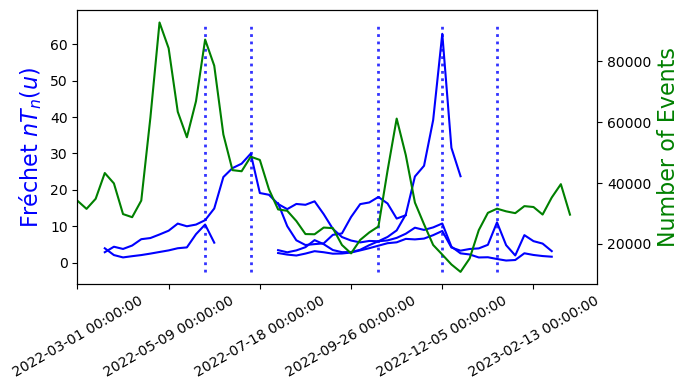

In [169]:
fig, ax = plt.subplots(figsize=(7, 4))

for i, test_stats in enumerate(MHP_cp.test_stats):
    seq, since, until = test_stats
    ax.plot(np.arange(since, until), seq, ls="-", color='b', label='Fréchet') #marker='*', markevery=5,

ymin, ymax = ax.get_ylim() 
for changepoint in MHP_cp.cp_detected:
    ax.vlines(x=changepoint, ymin=ymin, ymax=ymax, color='b', ls=":", lw=2, alpha=0.8)

ax1 = ax.twinx()
ax1.plot(np.array(events_count_week[:-1])+np.array(events_count_week[1:]), color='g')
ax.set_xlim([0, len(phi_list)+1])
ax.set_ylabel('Fréchet ' + r"$nT_n(u)$", color='b', fontsize=16)
ax1.set_ylabel('Number of Events', color='g', fontsize=16)
labels = [list_start_of_week[i] for i in range(0, 60, 10)] # [list(events.keys())[i] for i in range(0, 60, 10)]
ax.set_xticklabels(labels, rotation=30)

plt.tight_layout()
plt.savefig('frechet.png', dpi=200)